#### Install & Import Libraries

In [1]:
!pip install yfinance

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### Stock Data Analysis

In this data science project, we have conducted a comprehensive analysis of historical stock data for **Apple Inc.** (stock symbol: *AAPL*), one of the world's foremost technology companies.

Our project encompasses the following key aspects:
- **Data Collection**: We gathered historical stock price data for AAPL, a vital step in understanding its performance over time.

- **Data Preprocessing**: Prior to analysis, we meticulously preprocessed the data, addressing issues such as missing values and calculating daily returns.

- **Data Visualization**:

Please note that you can easily adapt this notebook to analyze data for other stocks of interest by simply replacing *AAPL* with the desired stock symbol.


### Section 0: Data Collection & Pre-Processing

#### Stock Background

In the provided example and discussion, we are analyzing the historical stock data of Apple Inc., which is a well-known and prominent technology company. Apple Inc. is primarily known for its consumer electronics, software, and services, including products like the iPhone, iPad, Mac, and various software applications.

The stock symbol for Apple Inc. is AAPL. This analysis focuses on understanding the historical performance of Apple Inc.'s stock using data science techniques, including data collection, preprocessing, portfolio metrics calculation, and portfolio optimization. Please note that you can adapt this analysis to analyze data for other stocks by replacing "AAPL" with the stock symbol of your choice.


In [108]:
# data_collection.py
import yfinance as yf
import pandas as pd

def fetch_stock_data(symbol, start_date, end_date):

    # Fetch stock data from Yahoo Finance
    stock_data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=False)
    return stock_data

def collect_portfolio_data(portfolio_symbols, start_date, end_date):
    """
    Collect historical stock data for a portfolio of assets and save it to a CSV file.

    Args:
        portfolio_symbols (list): List of stock symbols representing the assets in the portfolio.
        start_date (str): Start date for historical data collection (e.g., "YYYY-MM-DD").
        end_date (str): End date for historical data collection (e.g., "YYYY-MM-DD").

    Returns:
        pd.DataFrame: DataFrame containing historical data for the portfolio.
    """
    # Create an empty DataFrame to store the portfolio data
    portfolio_data = pd.DataFrame()

    # Iterate through portfolio symbols and fetch data
    for symbol in portfolio_symbols:
        asset_data = yf.download(symbol, start=start_date, end=end_date,auto_adjust=False)
        print(asset_data.head())

        # Extract the 'Adj Close' prices and add a 'Date' column
        asset_data = asset_data[['Adj Close']].rename(columns={'Adj Close': symbol})
        asset_data['Date'+f'_{symbol}'] = asset_data.index.date  # Extract the date from the index

        # Merge the asset's data with the portfolio data, using a suffix for columns from asset_data
        if portfolio_data.empty:
            portfolio_data = asset_data
        else:
            portfolio_data = portfolio_data.merge(
                asset_data,
                left_index=True,
                right_index=True,
                how='outer',
                suffixes=('', f'_{symbol}')
            )


    return portfolio_data

if __name__ == "__main__":

    # symbol = "AAPL"  # Replace with your chosen stock symbol
    portfolio_symbols = ["AAPL", "MSFT", "GOOGL", "TSLA"]  # Example portfolio with multiple assets
    start_date = "2016-01-01"
    end_date = "2022-12-31"

    # stock_data = fetch_stock_data(symbol, start_date, end_date)
    # stock_data.to_csv("../data/stock_data.csv")

    portfolio_data = collect_portfolio_data(portfolio_symbols, start_date, end_date)
    portfolio_data.to_csv("portfolio_data.csv", index=False)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2016-01-04  23.860575  26.337500  26.342501  25.500000  25.652500  270597600
2016-01-05  23.262648  25.677500  26.462500  25.602501  26.437500  223164000
2016-01-06  22.807413  25.174999  25.592501  24.967501  25.139999  273829600
2016-01-07  21.844837  24.112499  25.032499  24.107500  24.670000  324377600
2016-01-08  21.960344  24.240000  24.777500  24.190001  24.637501  283192000
Price       Adj Close      Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                                       
2016-01-04  48.337418  54.799999  54.799999  53.389999  54.320000  53778000
2016-01-05  48.557934  55.049999  55.389999  54.540001  54.930000  34079700
2016

In [109]:
# Set your stock symbol, date range, and risk-free rate
stock_symbol = "AAPL"  # Replace with your chosen stock symbol
start_date = "2010-01-01"
end_date = "2020-12-31"
risk_free_rate = 0.03  # Adjust as needed

# Fetch stock data using the imported function
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Display collected stock data
display(stock_data)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.447412,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.355827,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.344079,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2020-12-23,128.059891,130.960007,132.429993,130.779999,132.160004,88223700
2020-12-24,129.047546,131.970001,133.460007,131.100006,131.320007,54930100


In [111]:
import pandas as pd
import numpy as np

def preprocess_portfolio(data):
    """
    Preprocess historical stock data for a portfolio of assets without changing column names.

    Args:
        data (pd.DataFrame): DataFrame containing historical stock data.

    Returns:
        pd.DataFrame: Preprocessed data with additional metrics (returns, rolling stats).
    """
    # Ensure no missing values in the dataset
    data.dropna(inplace=True)

    # Identify numerical columns for calculations (excluding Date and Ticker)
    numerical_columns = [col for col in data.columns if col not in ["Date", "Ticker"]]

    # Calculate daily returns
    for col in numerical_columns:
        data[f"Daily Returns {col}"] = data[col].pct_change()

    # Calculate log returns
    for col in numerical_columns:
        data[f"Log Returns {col}"] = np.log(1 + data[col].pct_change())

    # Calculate rolling mean and standard deviation
    window = 20  # Rolling window size
    for col in numerical_columns:
        data[f"Rolling Mean {col}"] = data[col].rolling(window=window).mean()
        data[f"Rolling Std {col}"] = data[col].rolling(window=window).std()

    return data




In [33]:
# Preprocess the data using the imported function
preprocessed_data = preprocess_portfolio(stock_data)

# Display pre-processed data
display(preprocessed_data)

Price,Adj Close,Close,High,Low,Open,Volume,"Daily Returns ('Adj Close', 'AAPL')","Daily Returns ('Close', 'AAPL')","Daily Returns ('High', 'AAPL')","Daily Returns ('Low', 'AAPL')",...,"Rolling Mean ('Close', 'AAPL')","Rolling Std ('Close', 'AAPL')","Rolling Mean ('High', 'AAPL')","Rolling Std ('High', 'AAPL')","Rolling Mean ('Low', 'AAPL')","Rolling Std ('Low', 'AAPL')","Rolling Mean ('Open', 'AAPL')","Rolling Std ('Open', 'AAPL')","Rolling Mean ('Volume', 'AAPL')","Rolling Std ('Volume', 'AAPL')"
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.447412,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001729,0.005082,0.004096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.355827,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.015906,-0.001670,-0.011723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.344079,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001849,-0.015007,-0.008066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006648,0.000000,0.000048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,128.059891,130.960007,132.429993,130.779999,132.160004,88223700,-0.006976,-0.006976,-0.014731,0.008716,...,124.106000,4.290210,125.213500,4.432089,122.506999,4.178932,123.6690,4.557990,105937900.0,3.852456e+07
2020-12-24,129.047546,131.970001,133.460007,131.100006,131.320007,54930100,0.007712,0.007712,0.007778,0.002447,...,124.903000,4.190395,126.049001,4.326404,123.303499,4.224776,124.4575,4.442115,104859445.0,3.967671e+07


### Section 1: Exploratory Stock Data Analysis

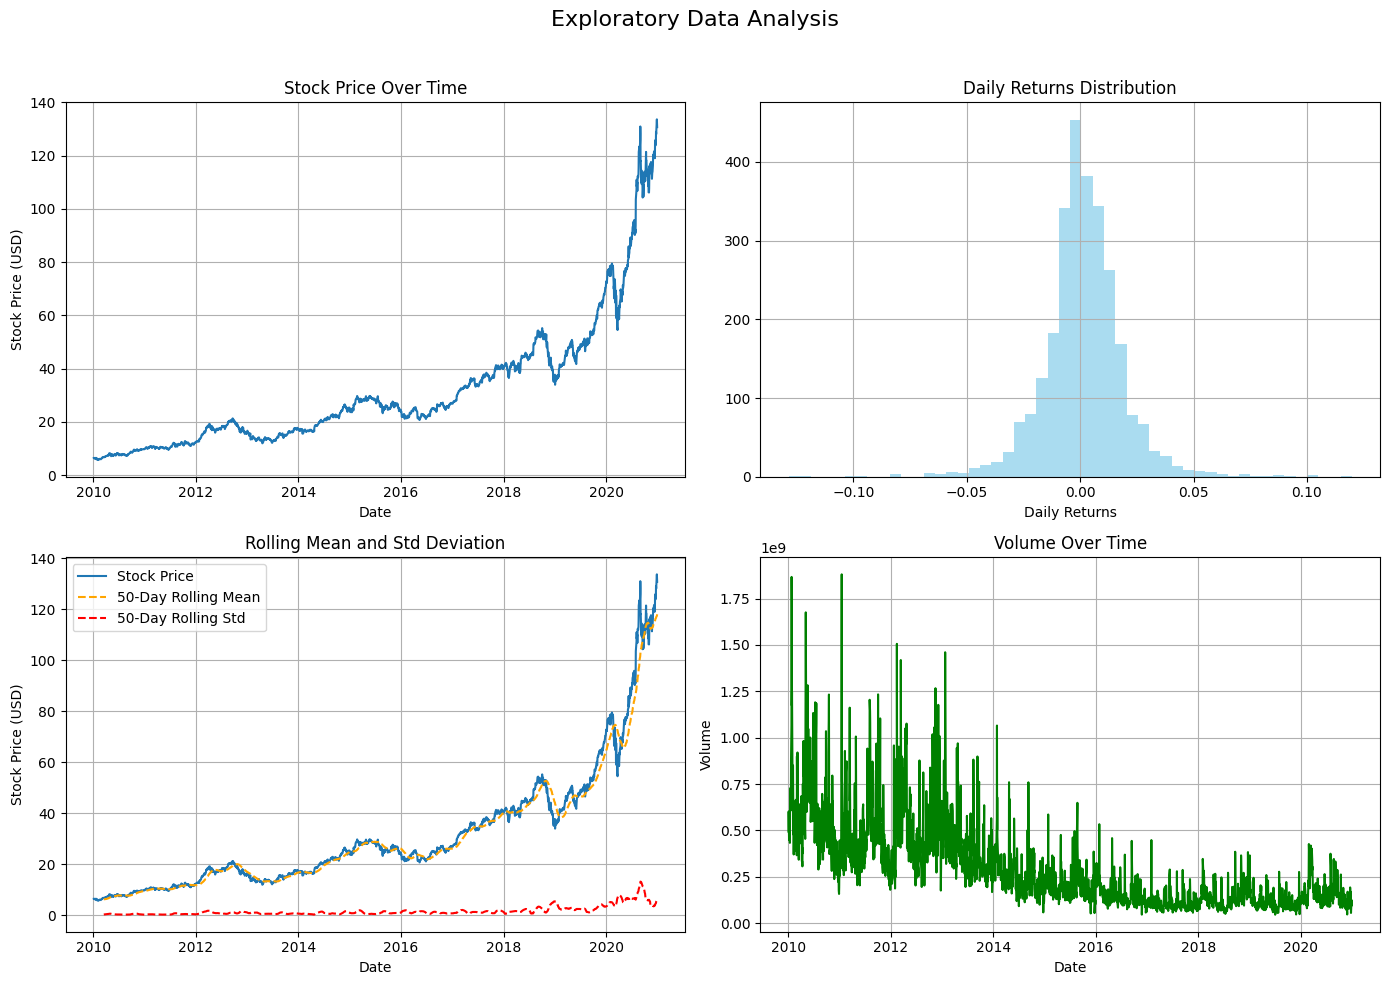

In [34]:
# Create a 2x2 subplot layout for EDA plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Exploratory Data Analysis", fontsize=16)

# Plot 1: Stock Price Over Time
axes[0, 0].plot(stock_data['Adj Close'])
axes[0, 0].set_title("Stock Price Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Stock Price (USD)")
axes[0, 0].grid(True)

# Plot 2: Daily Returns Distribution
# axes[0, 1].hist(stock_data['Adj Close'].pct_change().dropna(), bins=50, color='skyblue', alpha=0.7)
# axes[0, 1].set_title("Daily Returns Distribution")
# axes[0, 1].set_xlabel("Daily Returns")
# axes[0, 1].grid(True)
# Plot 2: Daily Returns Distribution
# Replace infinite values with NaN
daily_returns = stock_data['Close'].pct_change().dropna()
daily_returns = daily_returns.replace([np.inf, -np.inf], np.nan).dropna()

axes[0, 1].hist(daily_returns, bins=50, color='skyblue', alpha=0.7)
axes[0, 1].set_title("Daily Returns Distribution")
axes[0, 1].set_xlabel("Daily Returns")
axes[0, 1].grid(True)
# Plot 3: Rolling Mean and Standard Deviation
axes[1, 0].plot(stock_data['Adj Close'], label='Stock Price')
axes[1, 0].plot(stock_data['Adj Close'].rolling(window=50).mean(), label='50-Day Rolling Mean', linestyle='--', color='orange')
axes[1, 0].plot(stock_data['Adj Close'].rolling(window=50).std(), label='50-Day Rolling Std', linestyle='--', color='red')
axes[1, 0].set_title("Rolling Mean and Std Deviation")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Stock Price (USD)")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Volume Over Time
axes[1, 1].plot(stock_data['Volume'], color='green')
axes[1, 1].set_title("Volume Over Time")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Volume")
axes[1, 1].grid(True)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the EDA plots
plt.show()

**Comment:** In the code examples and discussions provided earlier, I used only Apple Inc. (AAPL) stock as an example for simplicity and to demonstrate the steps involved in portfolio optimization using a single asset. In practice, portfolio optimization involves selecting a combination of multiple assets to construct a diversified portfolio. To extend the analysis, we will include multiple assets in the next Jupyter notebook.

In [128]:
# optimization.py
import numpy as np
from scipy.optimize import minimize

def optimize_portfolio(expected_returns, cov_matrix, constraints=None, risk_free_rate=0.0):
    """
    Optimize the allocation of assets in a portfolio.

    Args:
        expected_returns (np.ndarray): Array of expected returns for each asset.
        cov_matrix (np.ndarray): Covariance matrix of asset returns.
        constraints (dict): Dictionary of optimization constraints (e.g., minimum/maximum allocation, target return).
        risk_free_rate (float): Risk-free rate for calculating the Sharpe ratio.

    Returns:
        dict: A dictionary containing optimized portfolio weights and metrics.
    """
    # Define the number of assets in the portfolio
    num_assets = len(expected_returns)

    # Define the initial portfolio weights (e.g., equal weights for simplicity)
    initial_weights = np.array([1.0 / num_assets] * num_assets)

    # Define the optimization objective function (e.g., maximize Sharpe ratio)
    def objective_function(weights):
        portfolio_return = np.sum(expected_returns * weights)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return -sharpe_ratio  # Minimize the negative Sharpe ratio

    # Define bounds for the weights (0 to 1 for each asset, representing long-only)
    bounds = [(0, 1) for _ in range(num_assets)]

    # Perform portfolio optimization
    result = minimize(
        objective_function,
        initial_weights,
        method='SLSQP',  # You can use other optimization methods as well
        bounds=bounds  # Enforce bounds for each asset weight (0 to 1)
    )


    # Extract the optimized portfolio weights
    optimized_weights = result.x

    # Calculate portfolio metrics (e.g., return, volatility)
    portfolio_return = np.sum(expected_returns * optimized_weights)
    portfolio_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(cov_matrix, optimized_weights)))

    # Calculate Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Create a dictionary to store the results
    optimization_results = {
        "Portfolio Weights": optimized_weights,
        "Portfolio Return": portfolio_return,
        "Portfolio Volatility": portfolio_volatility,
        "Sharpe Ratio": sharpe_ratio,
    }

    return optimization_results

In [94]:
# portfolio_analysis.py
import pandas as pd
import numpy as np

def calculate_portfolio_metrics(data):
    """
    Calculate portfolio metrics for a portfolio of assets.

    Args:
        data (pd.DataFrame): DataFrame containing preprocessed data for the portfolio.

    Returns:
        dict: A dictionary containing portfolio metrics.
    """
    # Calculate mean returns and standard deviation for each asset in the portfolio
    returns_columns = [col for col in data.columns if "Returns" in col]
    mean_returns = data[returns_columns].mean()
    std_deviation = data[returns_columns].std()

    # Calculate portfolio weights (e.g., equal weights for simplicity)
    num_assets = len(returns_columns)
    weights = np.array([1 / num_assets] * num_assets)

    # Calculate portfolio expected return and risk
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(data[returns_columns].cov(), weights)))

    # Create a dictionary to store portfolio metrics
    portfolio_metrics = {
        "Portfolio Return": portfolio_return,
        "Portfolio Risk": portfolio_risk,
        "Mean Returns": mean_returns,
        "Standard Deviation": std_deviation,
        "Weights": weights,
    }

    return portfolio_metrics

# Install & Import Libraries

Stock Data Analysis
In this data science project, we have conducted a comprehensive analysis of historical stock data for Apple Inc. (stock symbol: AAPL), one of the world's foremost technology companies.

Our project encompasses the following key aspects:

* **Data Collection**: We gathered historical stock price data for AAPL, a vital


step in understanding its performance over time.

* **Data Preprocessing**: Prior to analysis, we meticulously preprocessed the data, addressing issues such as missing values and calculating daily returns.

* **Portfolio Metrics**: We calculated various portfolio metrics, providing insights into AAPL's historical performance.

* **Portfolio Optimization**: Employing mean-variance optimization, we optimized a portfolio comprised of AAPL and other assets, considering risk and return trade-offs.

Please note that you can easily adapt this project to analyze data for other stocks of interest by simply replacing AAPL with the desired stock symbol.

In [115]:
portfolio_symbols = ["AAPL", "MSFT", "GOOGL", "TSLA"]

In [148]:
import pandas as pd

# Load the portfolio data
portfolio_data = pd.read_csv("portfolio_data.csv")

# Remove the first row without resetting the index
portfolio_data = portfolio_data.iloc[1:]

# Display the updated DataFrame
display(portfolio_data)



,AAPL,Date_AAPL,MSFT,Date_MSFT,GOOGL,Date_GOOGL,TSLA,Date_TSLA
1,23.86057472229004,2016-01-04,48.33741760253906,2016-01-04,37.83484649658203,2016-01-04,14.894000053405762,2016-01-04
2,23.26264762878418,2016-01-05,48.55793380737305,2016-01-05,37.938968658447266,2016-01-05,14.895333290100098,2016-01-05
3,22.80741310119629,2016-01-06,47.675872802734375,2016-01-06,37.82936477661133,2016-01-06,14.602666854858398,2016-01-06
4,21.844837188720703,2016-01-07,46.01758575439453,2016-01-07,36.91617965698242,2016-01-07,14.376667022705078,2016-01-07
5,21.960344314575195,2016-01-08,46.1587028503418,2016-01-08,36.41350173950195,2016-01-08,14.066666603088379,2016-01-08
...,...,...,...,...,...,...,...,...
1758,130.48780822753906,2022-12-23,234.8754425048828,2022-12-23,88.90770721435547,2022-12-23,123.1500015258789,2022-12-23
1759,128.6768341064453,2022-12-27,233.13401794433594,2022-12-27,87.07434844970703,2022-12-27,109.0999984741211,2022-12-27
1760,124.7283706665039,2022-12-28,230.7432403564453,2022-12-28,85.70929718017578,2022-12-28,112.70999908447266,2022-12-28
1761,128.26119995117188,2022-12-29,237.11862182617188,2022-12-29,88.1305160522461,2022-12-29,121.81999969482422,2022-12-29


# Exploratory Data Visualization

In [149]:
portfolio_data.to_csv("portfolio_data1.csv")

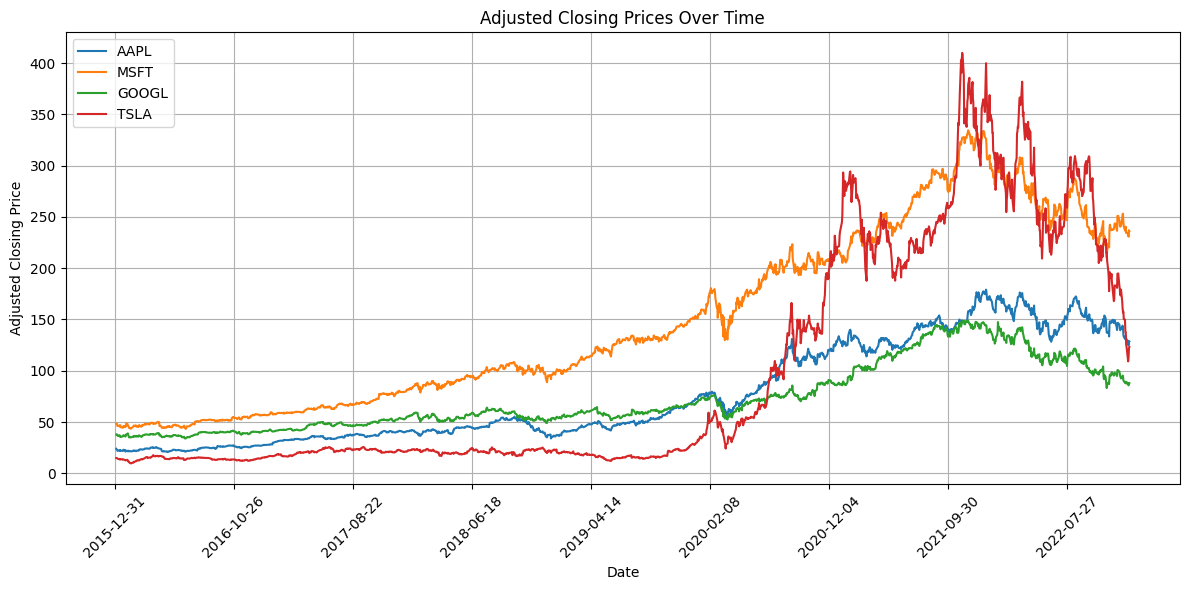

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'portfolio_data1.csv'
portfolio_data = pd.read_csv(file_path)

# Plot the adjusted closing prices for each stock
plt.figure(figsize=(12, 6))

# Dynamically plot for each stock based on the column names
plt.plot(pd.to_datetime(portfolio_data['Date_AAPL']), portfolio_data['AAPL'], label='AAPL')
plt.plot(pd.to_datetime(portfolio_data['Date_MSFT']), portfolio_data['MSFT'], label='MSFT')
plt.plot(pd.to_datetime(portfolio_data['Date_GOOGL']), portfolio_data['GOOGL'], label='GOOGL')
plt.plot(pd.to_datetime(portfolio_data['Date_TSLA']), portfolio_data['TSLA'], label='TSLA')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Adjusted Closing Prices Over Time")
plt.legend(loc="upper left")
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Reduce the number of displayed date labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust to display fewer x-axis ticks

# Apply tight layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


# Section 1: Preprocess data

In [151]:
# data_preprocessing.py
import pandas as pd
import numpy as np

def preprocess_portfolio_data(data):
    """
    Preprocess historical stock data for a portfolio of assets.

    Args:
        data (pd.DataFrame): DataFrame containing historical data for the portfolio.

    Returns:
        pd.DataFrame: Preprocessed portfolio data.
    """
    # Remove rows with missing values
    data.dropna(inplace=True)

    # Calculate daily returns for each asset in the portfolio
    returns_columns = [col for col in data.columns if "Date" not in col]
    data[returns_columns] = data[returns_columns].pct_change()

    # Calculate log returns for each asset in the portfolio
    log_returns_columns = [f"Log Returns ({col})" for col in returns_columns]
    data[log_returns_columns] = np.log(1 + data[returns_columns])

    # Calculate rolling mean and standard deviation for each asset in the portfolio
    window = 20  # Adjust the window size as needed
    rolling_mean_columns = [f"Rolling Mean ({col})" for col in returns_columns]
    rolling_std_columns = [f"Rolling Std ({col})" for col in returns_columns]
    data[rolling_mean_columns] = data[returns_columns].rolling(window=window).mean()
    data[rolling_std_columns] = data[returns_columns].rolling(window=window).std()

    return data

In [152]:
# Preprocess portfolio data using the preprocess_portfolio_data function
preprocessed_data = preprocess_portfolio_data(portfolio_data)

display(preprocessed_data)

,Unnamed: 0,AAPL,Date_AAPL,MSFT,Date_MSFT,GOOGL,Date_GOOGL,TSLA,Date_TSLA,Log Returns (Unnamed: 0),...,Rolling Mean (Unnamed: 0),Rolling Mean (AAPL),Rolling Mean (MSFT),Rolling Mean (GOOGL),Rolling Mean (TSLA),Rolling Std (Unnamed: 0),Rolling Std (AAPL),Rolling Std (MSFT),Rolling Std (GOOGL),Rolling Std (TSLA)
0,NaN,NaN,2016-01-04,NaN,2016-01-04,NaN,2016-01-04,NaN,2016-01-04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000,-0.025059,2016-01-05,0.004562,2016-01-05,0.002752,2016-01-05,0.000090,2016-01-05,0.693147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.500000,-0.019569,2016-01-06,-0.018165,2016-01-06,-0.002889,2016-01-06,-0.019648,2016-01-06,0.405465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.333333,-0.042205,2016-01-07,-0.034783,2016-01-07,-0.024140,2016-01-07,-0.015477,2016-01-07,0.287682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.250000,0.005288,2016-01-08,0.003067,2016-01-08,-0.013617,2016-01-08,-0.021563,2016-01-08,0.223144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,0.000569,-0.002798,2022-12-23,0.002267,2022-12-23,0.016750,2022-12-23,-0.017551,2022-12-23,0.000569,...,0.000572,-0.005587,-0.001581,-0.004180,-0.018849,0.000002,0.020904,0.021628,0.021728,0.038722
1758,0.000569,-0.013878,2022-12-27,-0.007414,2022-12-27,-0.020621,2022-12-27,-0.114089,2022-12-27,0.000569,...,0.000572,-0.004967,-0.000794,-0.004488,-0.024570,0.000002,0.020438,0.021081,0.021924,0.043852
1759,0.000569,-0.030685,2022-12-28,-0.010255,2022-12-28,-0.015677,2022-12-28,0.033089,2022-12-28,0.000568,...,0.000572,-0.005444,-0.001011,-0.004824,-0.022344,0.000002,0.020940,0.021159,0.022047,0.045647
1760,0.000568,0.028324,2022-12-29,0.027630,2022-12-29,0.028249,2022-12-29,0.080827,2022-12-29,0.000568,...,0.000571,-0.006458,-0.002711,-0.006458,-0.022138,0.000002,0.018540,0.016773,0.017700,0.046125


# Section 2: Portfolio Metrics

In [136]:
# portfolio_analysis.py
import pandas as pd
import numpy as np

def calculate_portfolio_metrics(data):
    """
    Calculate portfolio metrics for a portfolio of assets.

    Args:
        data (pd.DataFrame): DataFrame containing preprocessed data for the portfolio.

    Returns:
        dict: A dictionary containing portfolio metrics.
    """
    # Calculate mean returns and standard deviation for each asset in the portfolio
    returns_columns = [col for col in data.columns if "Returns" in col]
    mean_returns = data[returns_columns].mean()
    std_deviation = data[returns_columns].std()

    # Calculate portfolio weights (e.g., equal weights for simplicity)
    num_assets = len(returns_columns)
    weights = np.array([1 / num_assets] * num_assets)

    # Calculate portfolio expected return and risk
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(data[returns_columns].cov(), weights)))

    # Create a dictionary to store portfolio metrics
    portfolio_metrics = {
        "Portfolio Return": portfolio_return,
        "Portfolio Risk": portfolio_risk,
        "Mean Returns": mean_returns,
        "Standard Deviation": std_deviation,
        "Weights": weights,
    }

    return portfolio_metrics

In [153]:
# portfolio_analysis.py
import pandas as pd
import numpy as np

def calculate_portfolio_metrics(data):
    """
    Calculate portfolio metrics for a portfolio of assets.

    Args:
        data (pd.DataFrame): DataFrame containing preprocessed data for the portfolio.

    Returns:
        dict: A dictionary containing portfolio metrics.
    """
    # Calculate mean returns and standard deviation for each asset in the portfolio
    returns_columns = [col for col in data.columns if "Returns" in col]
    mean_returns = data[returns_columns].mean()
    std_deviation = data[returns_columns].std()

    # Calculate portfolio weights (e.g., equal weights for simplicity)
    num_assets = len(returns_columns)
    weights = np.array([1 / num_assets] * num_assets)

    # Calculate portfolio expected return and risk
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(data[returns_columns].cov(), weights)))

    # Create a dictionary to store portfolio metrics
    portfolio_metrics = {
        "Portfolio Return": portfolio_return,
        "Portfolio Risk": portfolio_risk,
        "Mean Returns": mean_returns,
        "Standard Deviation": std_deviation,
        "Weights": weights,
    }

    return portfolio_metrics

In [154]:
# Calculate portfolio metrics using the imported function
portfolio_metrics = calculate_portfolio_metrics(preprocessed_data)

# Display portfolio metrics
print("Section 1: Portfolio Metrics")
print(portfolio_metrics)

Section 1: Portfolio Metrics
{'Portfolio Return': 0.0015559004113994805, 'Portfolio Risk': 0.01549010460677658, 'Mean Returns': Log Returns (Unnamed: 0)    0.004244
Log Returns (AAPL)          0.000956
Log Returns (MSFT)          0.000900
Log Returns (GOOGL)         0.000479
Log Returns (TSLA)          0.001200
dtype: float64, 'Standard Deviation': Log Returns (Unnamed: 0)    0.023171
Log Returns (AAPL)          0.019148
Log Returns (MSFT)          0.017742
Log Returns (GOOGL)         0.017782
Log Returns (TSLA)          0.036998
dtype: float64, 'Weights': array([0.2, 0.2, 0.2, 0.2, 0.2])}


# Section 3: Optimized Portfolio Weights

In [155]:
# Calculate expected returns and covariance matrix
returns_columns = [col for col in preprocessed_data.columns if "Returns" in col]
expected_returns = preprocessed_data[returns_columns].mean()
cov_matrix = preprocessed_data[returns_columns].cov()

# Define optimization constraints (e.g., minimum/maximum allocation, target return)
constraints = {
    "min_allocation": [0.0] * len(portfolio_symbols),  # Minimum allocation for each asset
    "max_allocation": [1.0] * len(portfolio_symbols),  # Maximum allocation for each asset
}

# Define the risk-free rate (adjust as needed)
risk_free_rate = 0.03  # Example risk-free rate

In [156]:
# Optimize portfolio allocation using the optimize_portfolio function
optimized_portfolio = optimize_portfolio(expected_returns, cov_matrix, constraints, risk_free_rate)

In [157]:
# Print the optimized portfolio results
print("Optimized Portfolio Weights:")

print(optimized_portfolio["Portfolio Weights"])

print("\nPortfolio Return:", optimized_portfolio["Portfolio Return"])
print("Portfolio Volatility:", optimized_portfolio["Portfolio Volatility"])
print("Sharpe Ratio:", optimized_portfolio["Sharpe Ratio"])

Optimized Portfolio Weights:
[1. 1. 1. 1. 1.]

Portfolio Return: 0.007779502056997386
Portfolio Volatility: 0.07745052303388253
Sharpe Ratio: -0.28689926255606746


# Portfolio Allocation Table

In [159]:

print("\nSection 4: Portfolio Allocation Table")

# Create a DataFrame to display the optimized portfolio allocation
optimized_weights = optimized_portfolio["Portfolio Weights"]

portfolio_allocation = pd.DataFrame(optimized_weights[4],
                                    index=portfolio_symbols,
                                    columns=["Allocation"])

print(portfolio_allocation)


Section 4: Portfolio Allocation Table
       Allocation
AAPL          1.0
MSFT          1.0
GOOGL         1.0
TSLA          1.0


In [127]:
optimized_weights

array([1., 1., 1., 1., 1.])

# Portfolio Allocation Pie Chart

In [170]:
# # Create a pie chart to visualize the portfolio allocation
# plt.figure(figsize=(8, 8))
# plt.pie(optimized_weights[4],
#         labels=portfolio_symbols,
#         autopct='%1.1f%%', startangle=140)
# plt.title("Portfolio Allocation Pie Chart")
# plt.show()

Optimized Weights: [1. 1. 1. 1. 1.], Length: 5
Portfolio Symbols: ['AAPL', 'MSFT', 'GOOGL', 'TSLA'], Length: 4


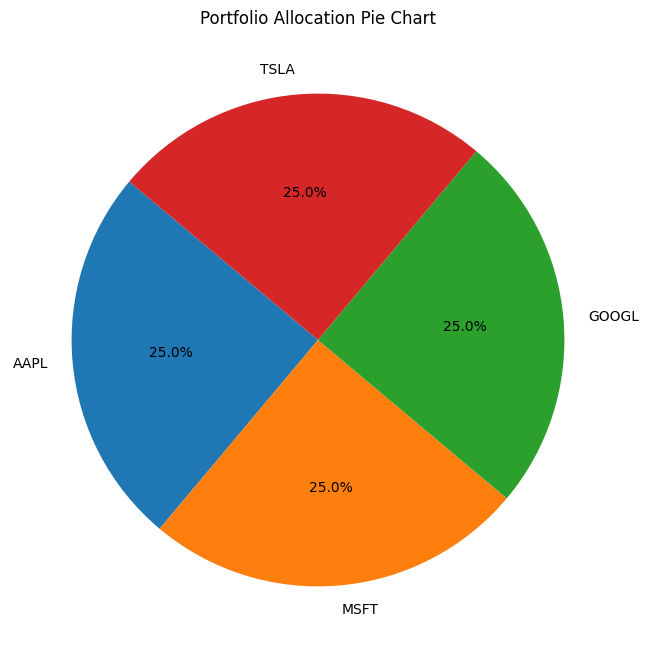

In [169]:
import matplotlib.pyplot as plt

# Debug: Ensure lengths match
print(f"Optimized Weights: {optimized_weights}, Length: {len(optimized_weights)}")
print(f"Portfolio Symbols: {portfolio_symbols}, Length: {len(portfolio_symbols)}")

# Fix the mismatch by aligning the weights and symbols
aligned_weights = optimized_weights[:len(portfolio_symbols)]  # Match the weights to symbols length

# Create a pie chart to visualize the portfolio allocation
plt.figure(figsize=(8, 8))
plt.pie(
    aligned_weights,  # Adjusted weights to match symbols
    labels=portfolio_symbols,  # Full array of symbols
    autopct='%1.1f%%',
    startangle=140
)

# Add a title
plt.title("Portfolio Allocation Pie Chart")

# Show the plot
plt.show()
